In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, f1_score, accuracy_score
from sklearn import metrics

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest


### Load WI breat cancer data

In [2]:
df_cancer=pd.read_csv('data.csv')
print("Data has",len(df_cancer),"rows and", len(df_cancer.columns),"columns.")

Data has 569 rows and 33 columns.


In [3]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df_cancer['diagnosis'].replace('B',0,inplace=True)
df_cancer['diagnosis'].replace('M',1,inplace=True)

In [6]:
Y1=df_cancer.diagnosis                        # M or B 
list = ['Unnamed: 32','id','diagnosis']
X1 = df_cancer.drop(list,axis = 1 )
X1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
print (df_cancer.shape, X1.shape, Y1.shape)

(569, 33) (569, 30) (569,)


### Load wine quality data

In [8]:
#wine quality data set
df_wine = pd.read_csv('winequality-white.csv',sep=';',quotechar='"')
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
def isTasty(quality):
    if quality >= 7:
        return 1
    else:
        return 0

In [10]:
df_wine['tasty'] = df_wine['quality'].apply(isTasty)

In [11]:
df_wine['tasty'].value_counts()

0    3838
1    1060
Name: tasty, dtype: int64

In [12]:
X2 = df_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y2 = df_wine['tasty']

In [13]:
X2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [14]:
print (df_wine.shape, X2.shape, Y2.shape)

(4898, 13) (4898, 11) (4898,)


In [15]:
#Y1 = Y1.values.flatten()
#print(Y1)

In [89]:
#Y2 = Y2.values.flatten()
#print(Y2)

In [16]:
# Feature scaling for clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#cancerX = StandardScaler().fit_transform(X1)
#wineX= StandardScaler().fit_transform(X2)

scaler = MinMaxScaler(feature_range=[0,100])
scaler.fit(X2)
wineX = pd.DataFrame(scaler.transform(X2))
#print(wineX)

scaler.fit(X1)
cancerX = pd.DataFrame(scaler.transform(X1))

In [17]:
print(cancerX.shape)
print(Y1.shape)

(569, 30)
(569,)


In [18]:
print(wineX.shape)
print(Y2.shape)

(4898, 11)
(4898,)


In [19]:
# Print information about the datasets
print ("<------------------------ Breast Cancer Dataset ------------------------>")
print ("Total number of examples: ", X1.shape[0])
print ("Share of positive examples: %.2f%%" % (Y1[Y1 == 1].shape[0]/Y1.shape[0]*100.0))
print ("Number of features: ", X1.shape[1])
print()
print ("<------------------------ Wine Quality Dataset ------------------------>")
print ("Total number of examples: ", X2.shape[0])
print ("Share of positive examples: %.2f%%" % (Y2[Y2 == 1].shape[0]/Y2.shape[0]*100.0))
print ("Number of features: ", X2.shape[1])
print()

# Random seed for reproducibility of experiments
random_seed = 100
np.random.seed(random_seed)

<------------------------ Breast Cancer Dataset ------------------------>
Total number of examples:  569
Share of positive examples: 37.26%
Number of features:  30

<------------------------ Wine Quality Dataset ------------------------>
Total number of examples:  4898
Share of positive examples: 21.64%
Number of features:  11



### 1. Run the clustering algorithms on the data sets and describe what you see.

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.623198
Homogeneity: 0.611
Completeness: 0.635
V-measure: 0.623
Run Time (s):   0.04514
For n_clusters = 2 The average silhouette_score is : 0.3845494883485513


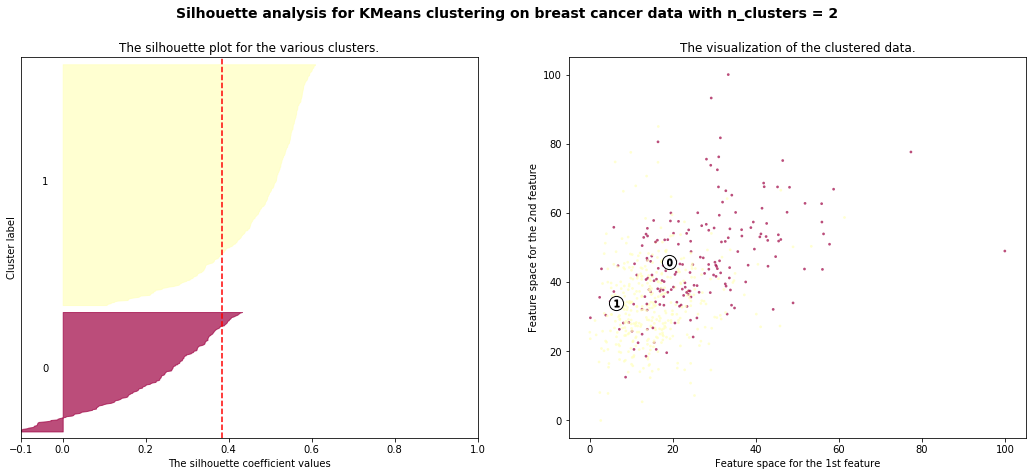

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.499271
Homogeneity: 0.586
Completeness: 0.426
V-measure: 0.493
Run Time (s):   0.08542
For n_clusters = 3 The average silhouette_score is : 0.33239324403592296


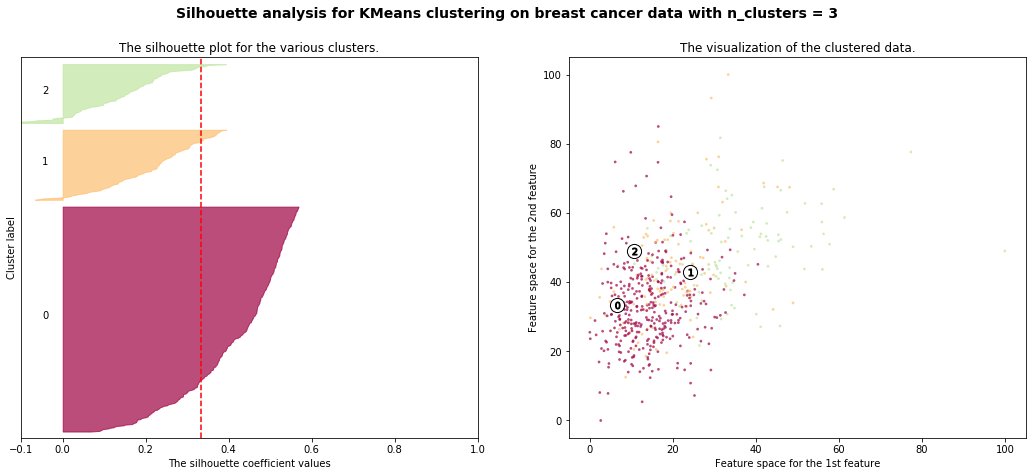

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.520311
Homogeneity: 0.657
Completeness: 0.412
V-measure: 0.506
Run Time (s):   0.07063
For n_clusters = 4 The average silhouette_score is : 0.3201558205937353


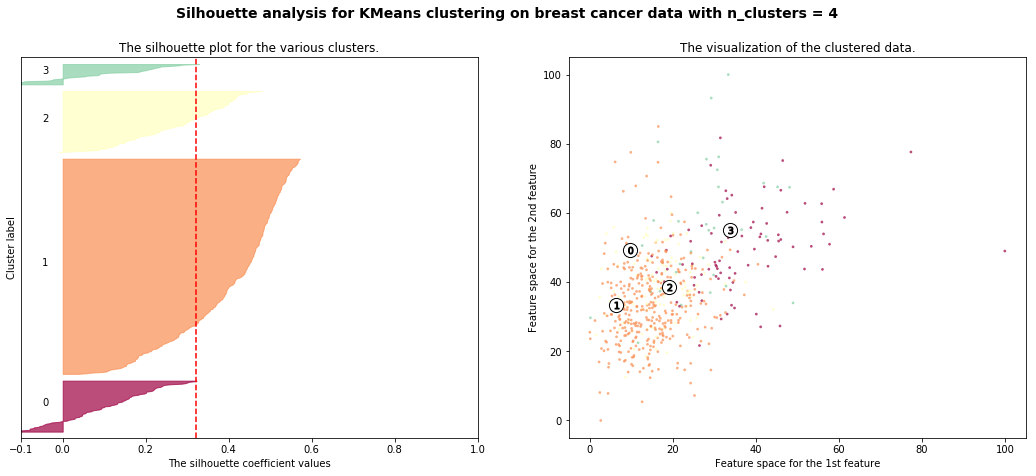

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.405681
Homogeneity: 0.644
Completeness: 0.255
V-measure: 0.366
Run Time (s):   0.13991
For n_clusters = 6 The average silhouette_score is : 0.15656525814722994


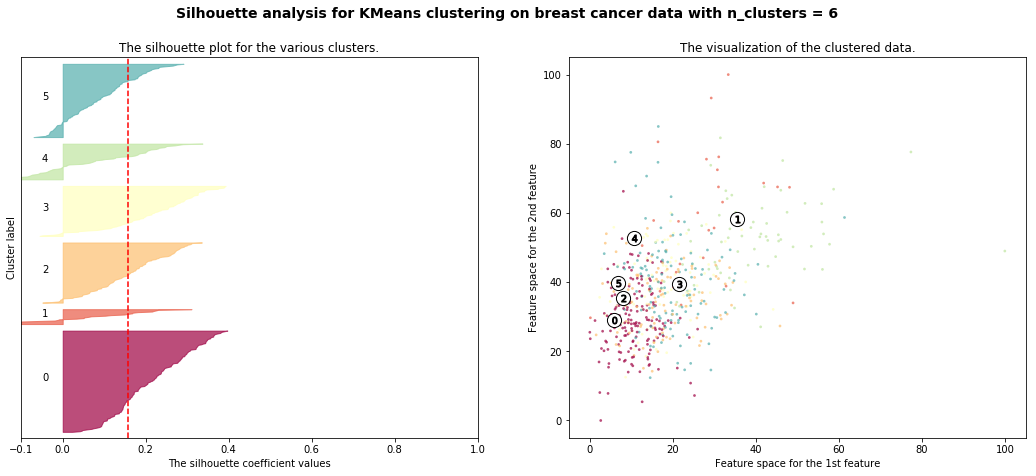

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.434435
Homogeneity: 0.748
Completeness: 0.252
V-measure: 0.377
Run Time (s):   0.16514
For n_clusters = 8 The average silhouette_score is : 0.1535572728479248


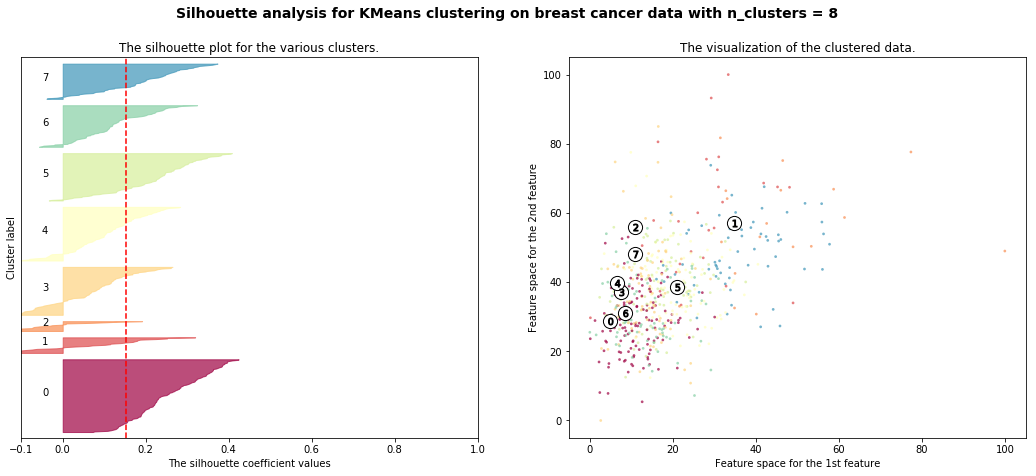

In [20]:
#K means clustering - Cancer
#source: https://github.com/lvwf1/CS7641_MachineLearningHW3/blob/master/winequality.py
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import timeit
import time

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import homogeneity_score


range_n_clusters = [2,3,4,6,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(cancerX) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(cancerX)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(Y1, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(Y1, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(Y1, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(Y1, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y1, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(cancerX, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(cancerX, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter( cancerX.iloc[:, 29], cancerX.iloc[:, 8], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 10], centers[:, 8], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter( c[10], c[8], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on breast cancer data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.106152
Homogeneity: 0.122
Completeness: 0.092
V-measure: 0.105
Run Time (s):   0.09290
For n_clusters = 2 The average silhouette_score is : 0.2461914566240223


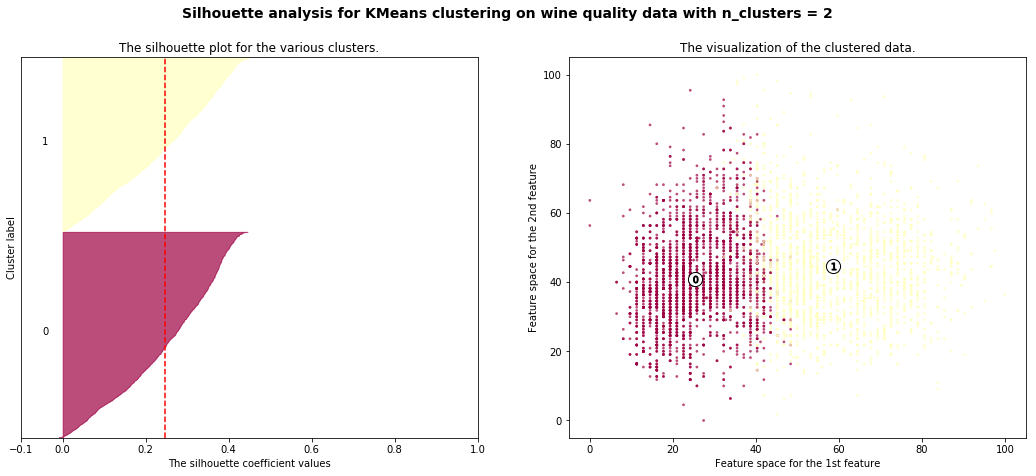

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.075601
Homogeneity: 0.109
Completeness: 0.053
V-measure: 0.071
Run Time (s):   0.24014
For n_clusters = 3 The average silhouette_score is : 0.19226127771622428


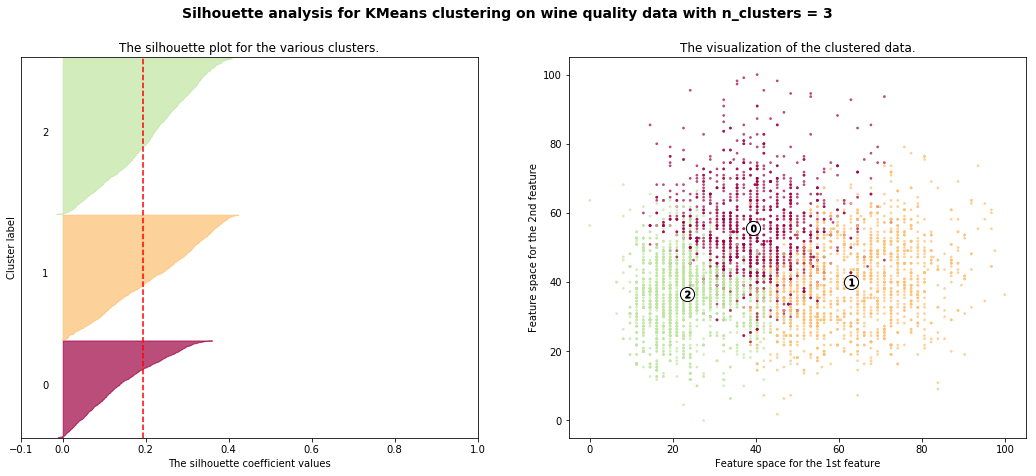

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.074487
Homogeneity: 0.120
Completeness: 0.046
V-measure: 0.067
Run Time (s):   0.23944
For n_clusters = 4 The average silhouette_score is : 0.17085057824231834


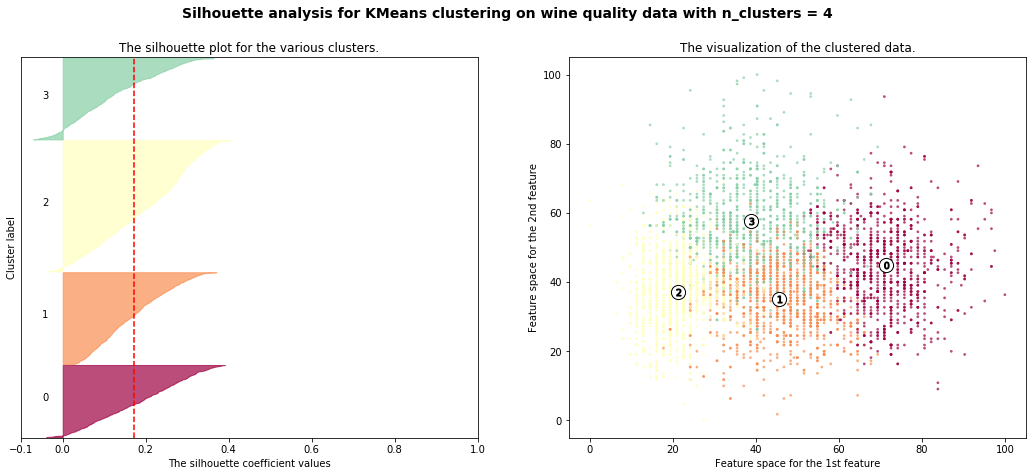

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.077325
Homogeneity: 0.142
Completeness: 0.042
V-measure: 0.065
Run Time (s):   0.37518
For n_clusters = 6 The average silhouette_score is : 0.14327831417038553


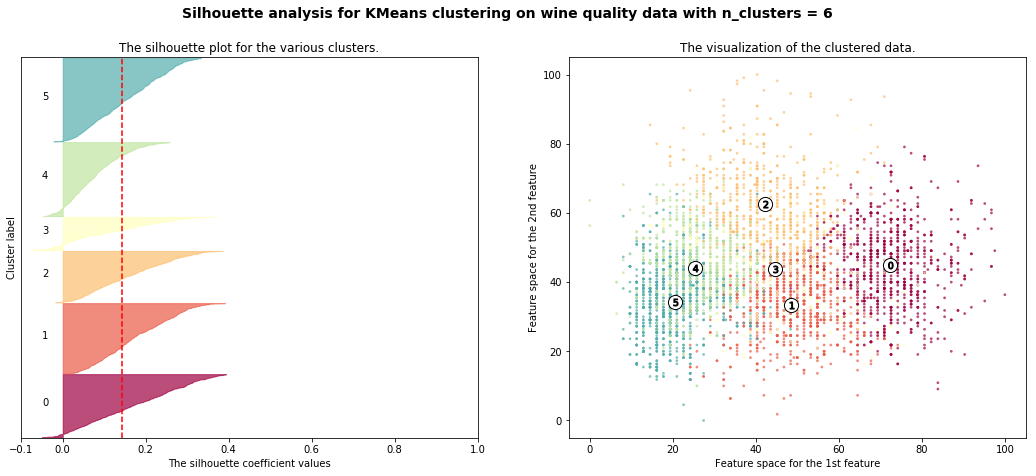

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.080310
Homogeneity: 0.158
Completeness: 0.041
V-measure: 0.065
Run Time (s):   0.53943
For n_clusters = 8 The average silhouette_score is : 0.13931575000416183


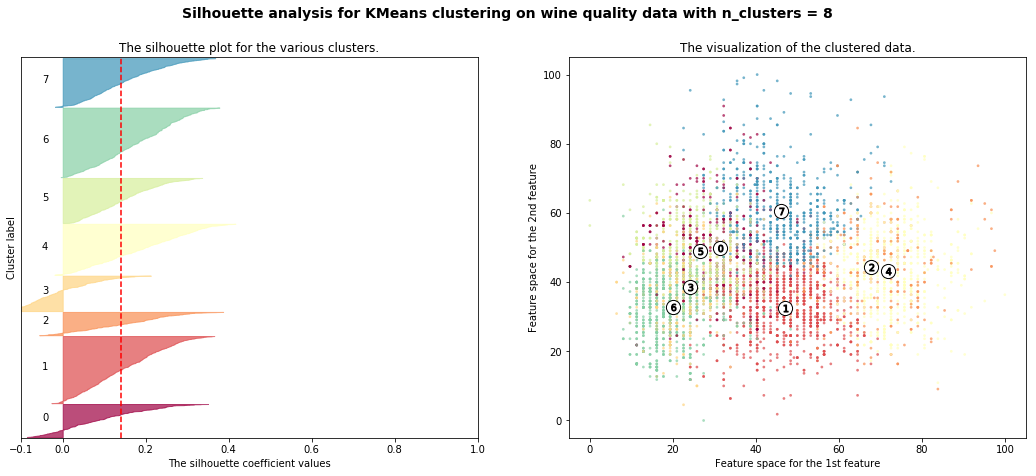

In [21]:
#K means clustering - Wine
#source: https://github.com/lvwf1/CS7641_MachineLearningHW3/blob/master/winequality.py
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import timeit
import time

range_n_clusters = [2,3,4,6,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(wineX) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(wineX)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(Y2, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(Y2, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(Y2, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(Y2, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y2, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(wineX, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(wineX, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter( wineX.iloc[:, 10], wineX.iloc[:, 8], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 10], centers[:, 8], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter( c[10], c[8], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on wine quality data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

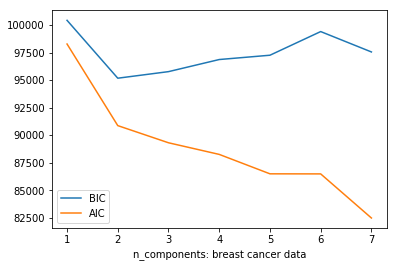

In [27]:
# Expectation Maximization clustering, BIC/AIC - cancer
n_components = np.arange(1, 8)
model1 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(cancerX)
          for n in n_components]

plt.plot(n_components, [m.bic(cancerX) for m in model1], label='BIC')
plt.plot(n_components, [m.aic(cancerX) for m in model1], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components: breast cancer data')
plt.show()

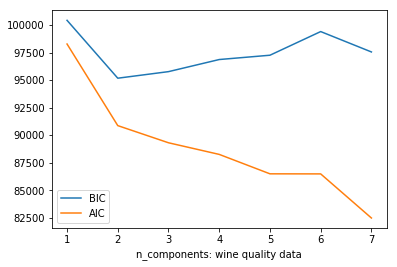

In [28]:
# Expectation Maximization clustering, BIC/AIC - cancer
n_components = np.arange(1, 8)
model2 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(cancerX)
          for n in n_components]

plt.plot(n_components, [m.bic(cancerX) for m in model2], label='BIC')
plt.plot(n_components, [m.aic(cancerX) for m in model2], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components: wine quality data')
plt.show()

NMI score: 0.668037
Homogeneity: 0.668
Completeness: 0.668
V-measure: 0.668
Run Time (s):   0.00945


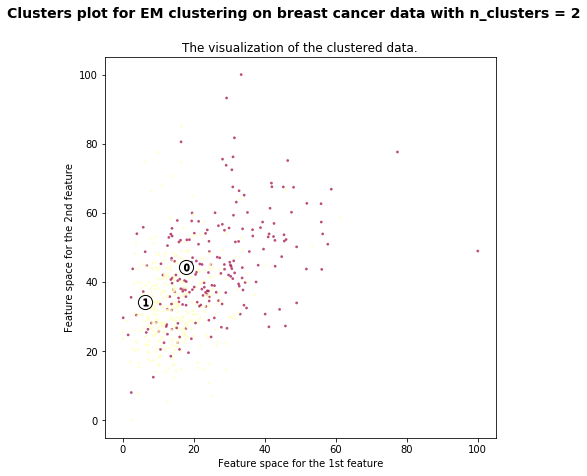

NMI score: 0.564831
Homogeneity: 0.679
Completeness: 0.470
V-measure: 0.555
Run Time (s):   0.01490


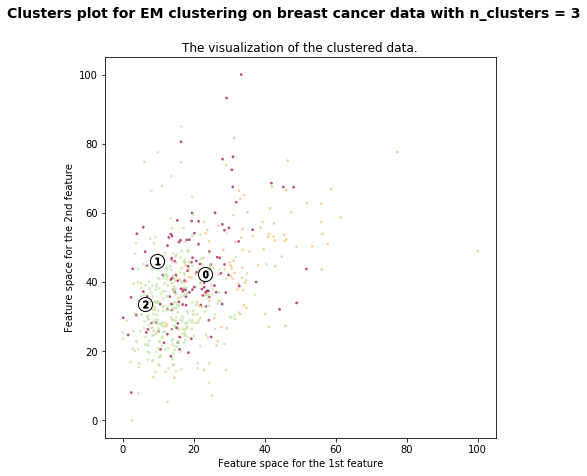

NMI score: 0.344156
Homogeneity: 0.477
Completeness: 0.248
V-measure: 0.327
Run Time (s):   0.03949


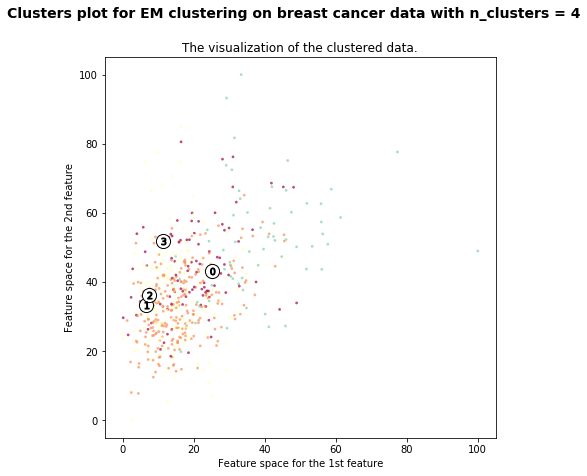

NMI score: 0.491881
Homogeneity: 0.757
Completeness: 0.320
V-measure: 0.449
Run Time (s):   0.05648


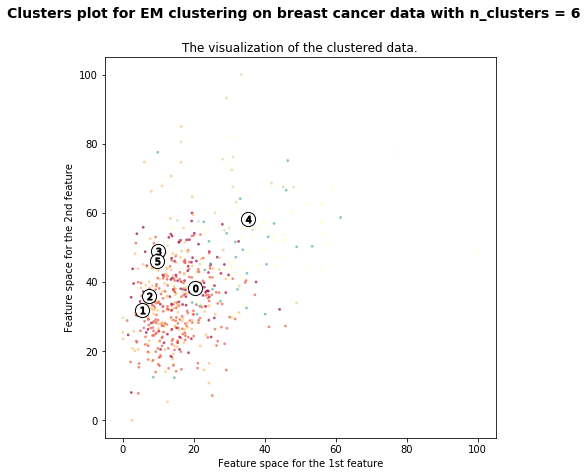

NMI score: 0.391270
Homogeneity: 0.666
Completeness: 0.230
V-measure: 0.342
Run Time (s):   0.03145


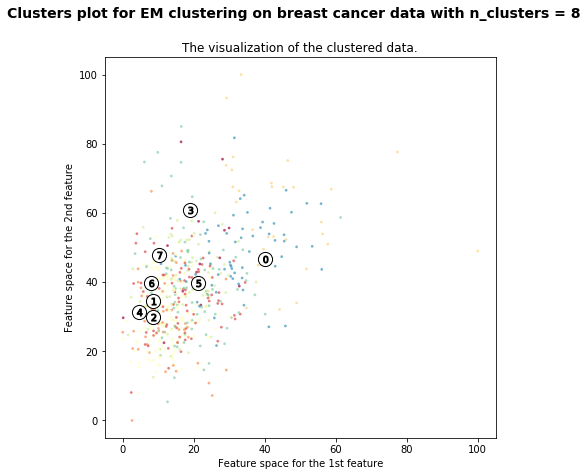

In [22]:
# Expectation Maximization clustering - cancer

for n_clusters in range_n_clusters:
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(cancerX)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.predict(cancerX)
    print("NMI score: %.6f" % normalized_mutual_info_score(Y1, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(Y1, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(Y1, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(Y1, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y1, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))

    # 2nd Plot showing the actual clusters formed
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    plt.scatter( cancerX.iloc[:, 29], cancerX.iloc[:, 8], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_

    # Draw white circles at cluster centers
    plt.scatter(centers[:, 10], centers[:, 8], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter( c[10], c[8], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Clusters plot for EM clustering on breast cancer data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

NMI score: 0.038125
Homogeneity: 0.031
Completeness: 0.048
V-measure: 0.037
Run Time (s):   0.04042


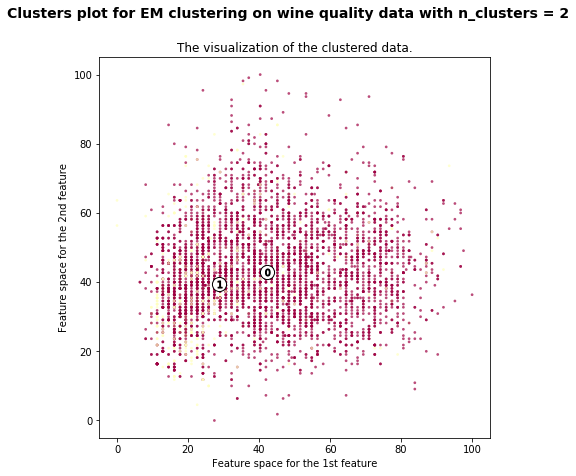

NMI score: 0.085256
Homogeneity: 0.112
Completeness: 0.065
V-measure: 0.082
Run Time (s):   0.06084


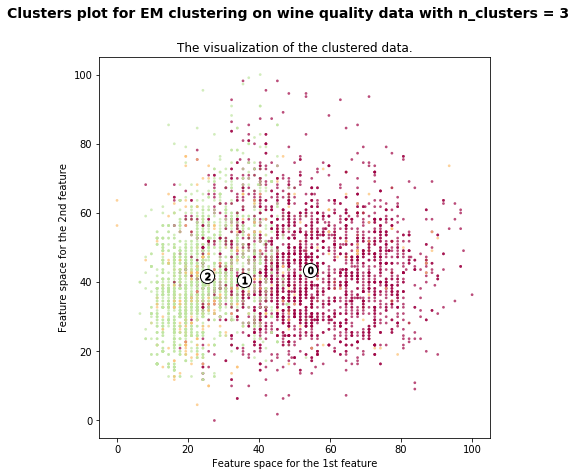

NMI score: 0.047088
Homogeneity: 0.073
Completeness: 0.030
V-measure: 0.043
Run Time (s):   0.15870


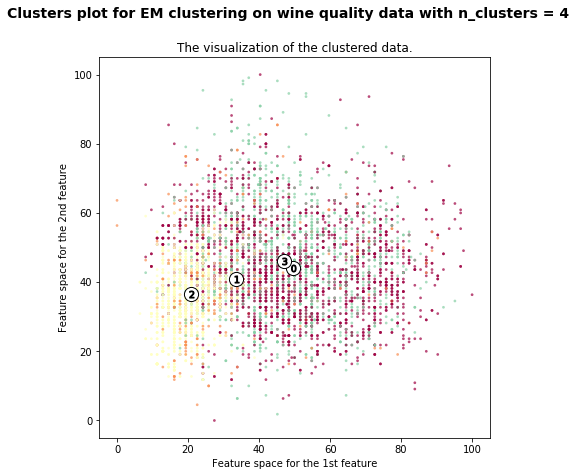

NMI score: 0.046650
Homogeneity: 0.083
Completeness: 0.026
V-measure: 0.040
Run Time (s):   0.31543


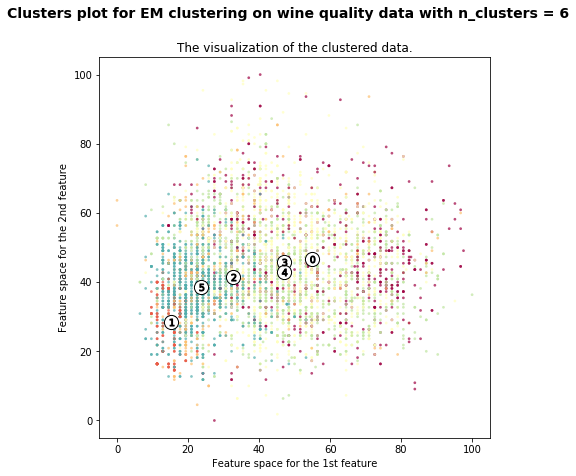

NMI score: 0.033563
Homogeneity: 0.064
Completeness: 0.018
V-measure: 0.028
Run Time (s):   0.30775


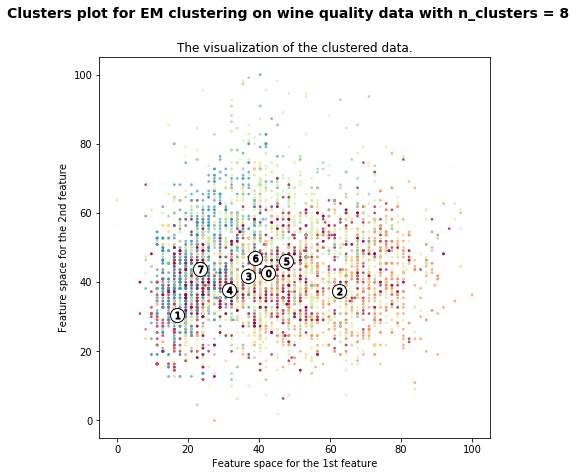

In [23]:
#Expectation Maximization clustering - wine

for n_clusters in range_n_clusters:
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(wineX)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.predict(wineX)
    #metrics
    #print('Evaluation Metrics')
    print("NMI score: %.6f" % normalized_mutual_info_score(Y2, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(Y2, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(Y2, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(Y2, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y2, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))
          
    # 2nd Plot showing the actual clusters formed
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    plt.scatter( wineX.iloc[:, 10], wineX.iloc[:, 8], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_

    # Draw white circles at cluster centers
    plt.scatter(centers[:, 10], centers[:, 8], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter( c[10], c[8], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Clusters plot for EM clustering on wine quality data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### 2. Apply the 4 dimensionality reduction algorithms to the two datasets and describe what you see.

### PCA

In [29]:
### PCA - wine
X2_train, X2_test, y2_train, y2_test=train_test_split(wineX, Y2, test_size=.3, random_state=10)
covariant_matrix=np.cov(X2_train.T)
covariant_matrix[0::5]

array([[ 65.16267057,  -3.02402217,  16.60437738,   5.54428435,
          0.56837805,  -2.15243473,   6.10468846,  11.89451895,
        -46.54568417,  -2.80905962, -18.45711691],
       [ -2.15243473,  -6.00745834,   4.46200967,  14.16236909,
          3.90129707,  33.59254287,  34.9210311 ,  10.07300091,
         -0.46134914,   4.49150699, -28.68166077],
       [-18.45711691,  12.73774798, -10.86530473, -70.4580333 ,
        -45.38393426, -28.68166077, -86.83776445, -89.41929837,
         33.06594609,  -7.47728831, 393.55940418]])

[473.48682896 221.58994353 158.49078432 108.37903733  86.41282235
   1.04738982  15.81612418  27.48491485  56.62604687  40.65621058
  48.75961902]


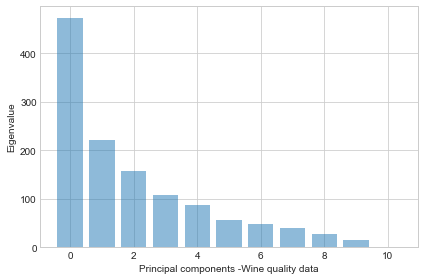

In [30]:
#Eigenvalues - wine
eigen_values, eigen_vectors=np.linalg.eig(covariant_matrix)
print(eigen_values)
sorted_eigen_values = sorted(eigen_values, reverse=True)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(11), sorted_eigen_values, alpha=0.5, align='center')
    plt.ylabel('Eigenvalue')
    plt.xlabel('Principal components -Wine quality data')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    


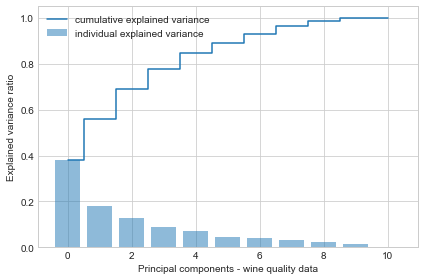

In [31]:
#source: https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
#source: https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_1_Principal_component_analysis%20_PCA.php
tot=sum(eigen_values)
var_exp=[(i/tot) for i in sorted(eigen_values, reverse=True)]
cum_var_exp=np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(11), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(11), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components - wine quality data')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [32]:
print(cum_var_exp)

[0.38222961 0.56111155 0.6890557  0.77654637 0.84630446 0.89201672
 0.93137868 0.96419904 0.98638667 0.99915448 1.        ]


In [33]:
### PCA - cancer
X1_train, X1_test, y1_train, y1_test=train_test_split(cancerX, Y1, test_size=.3, random_state=10)
covariant_matrix=np.cov(X1_train.T)
covariant_matrix[0::5]

array([[286.17224926,  77.37472297, 287.80308149, 256.55487936,
         36.56602135, 138.31823913, 223.18036653, 272.66585588,
         23.48443832, -80.47654852, 122.73639339, -17.74051612,
        116.86431605, 113.78455374, -37.12707508,  50.07191816,
         31.93425915,  80.62246556, -18.2690831 ,  -3.2732022 ,
        282.76920049,  72.45167587, 274.79148939, 225.91087953,
         21.4659424 , 103.31256062, 150.80472737, 279.24872121,
         22.15920117,  -3.52654897],
       [138.31823913,  51.89823359, 152.84498003, 123.58490934,
        121.26511991, 253.89625758, 261.81753966, 256.55616718,
        116.49404942, 130.4518524 ,  82.79939347,   8.47615737,
         87.35215321,  66.16657653,  19.51651219, 156.96833962,
         66.86367088, 119.37424529,  36.58480882,  75.88939431,
        147.43753452,  54.24458302, 159.18133142, 116.0229958 ,
        117.9371774 , 202.11532669, 210.37446025, 287.33943142,
         82.95037698, 127.15278563],
       [122.73639339,  44.7611

[3.27663662e+03 1.02698391e+03 4.44444760e+02 4.23782636e+02
 2.52101400e+02 1.76451274e+02 1.07114465e+02 7.62658170e+01
 6.33596229e+01 5.73987345e+01 5.45948471e+01 4.25831526e+01
 3.07072238e+01 2.40254495e+01 1.70369404e+01 1.64984720e+01
 1.22431855e+01 9.39876167e+00 8.82187846e+00 6.84186007e+00
 5.84445295e+00 4.63869238e+00 3.19428251e-02 1.82256971e-01
 4.07249378e-01 3.15874602e+00 2.77666958e+00 2.20384887e+00
 1.23112935e+00 1.33321420e+00]


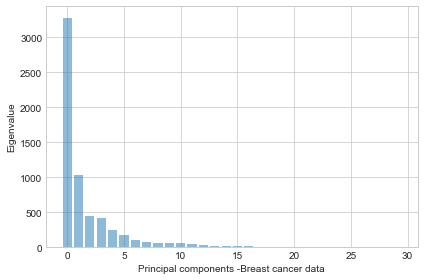

In [34]:
#Eigenvalues - wine
eigen_values, eigen_vectors=np.linalg.eig(covariant_matrix)
print(eigen_values)
sorted_eigen_values = sorted(eigen_values, reverse=True)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(30), sorted_eigen_values, alpha=0.5, align='center')
    plt.ylabel('Eigenvalue')
    plt.xlabel('Principal components -Breast cancer data')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    

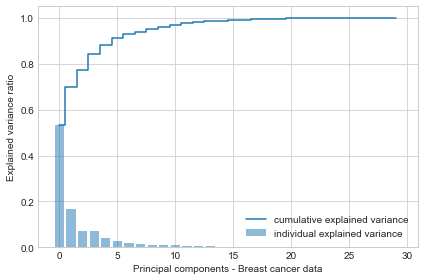

In [35]:
tot=sum(eigen_values)
var_exp=[(i/tot) for i in sorted(eigen_values, reverse=True)]
cum_var_exp=np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(30), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(30), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components - Breast cancer data')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [36]:
print(cum_var_exp)

[0.53286449 0.69987821 0.77215623 0.84107407 0.88207218 0.91076764
 0.92818718 0.94058994 0.95089383 0.96022833 0.96910684 0.97603194
 0.98102572 0.98493287 0.98770351 0.99038658 0.99237763 0.99390611
 0.99534077 0.99645343 0.99740389 0.99815826 0.99867195 0.99912351
 0.99948191 0.99969872 0.99989894 0.99996517 0.99999481 1.        ]


### ICA

[-7.79099974e-01  2.16718850e+00  6.39019719e+02  7.74912956e+00
  1.07814948e+00  1.03582604e+00  3.77648468e+01  1.57809333e+00
  2.89012107e+00  5.79667892e+00 -4.28070439e-01]


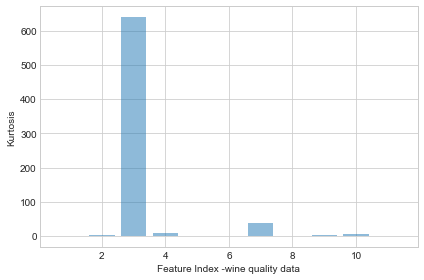

In [37]:
## ICA - wine
from scipy.stats import kurtosis
ica2 = FastICA(n_components=X2_train.shape[1])
X2_ica = ica2.fit_transform(X2_train)

kurt = kurtosis(X2_ica)
print(kurt)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(np.arange(1, len(kurt) + 1, 1), kurt, alpha=0.5, align='center')
    plt.ylabel('Kurtosis')
    plt.xlabel('Feature Index -wine quality data')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    


[  9.9677182    2.12549398   4.04353416   1.80041839  14.09363234
   3.30905235  10.89608578   8.82360945 171.07641268  10.52262245
  13.12218882  91.87974867  51.36851783  74.5974489   25.94773415
  49.92812335  -0.52009895   3.75129355  83.17515616  30.17494669
   7.41596376  18.80767893  11.94974335   5.91387147   8.19133333
  11.2812025    4.28551321  15.30413046  15.28352155  -0.60433079]


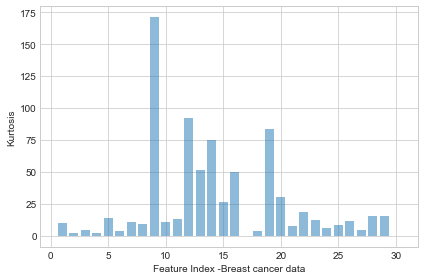

In [38]:
## ICA - cancer
from scipy.stats import kurtosis
ica1 = FastICA(n_components=X1_train.shape[1])
X1_ica = ica1.fit_transform(X1_train)

kurt = kurtosis(X1_ica)
print(kurt)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(np.arange(1, len(kurt) + 1, 1), kurt, alpha=0.5, align='center')
    plt.ylabel('Kurtosis')
    plt.xlabel('Feature Index -Breast cancer data')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    

#### A good discussion on ICA: https://stats.stackexchange.com/questions/375124/what-does-ica-return
Hyvarinen and Oja (2000). Independent Component Analysis: Algorithms and Applications.

### Randomized Projections

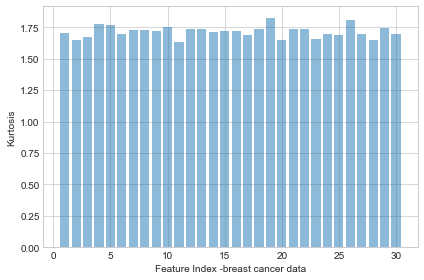

In [39]:
#Random Projection - cancer
ks = []
for i in range(1000):
    rp = GaussianRandomProjection(n_components=X1_train.shape[1])
    rp.fit(X1_train)
    X1_train_rp = rp.transform(X1_train)

    ks.append(kurtosis(X1_train_rp))

mean_k = np.mean(ks, 0)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(np.arange(1, len(mean_k) + 1, 1), mean_k, alpha=0.5, align='center')
    plt.ylabel('Kurtosis')
    plt.xlabel('Feature Index -breast cancer data')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

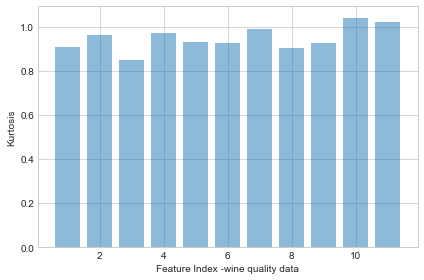

In [40]:
#Random Projection - wine
ks = []
for i in range(1000):
    rp = GaussianRandomProjection(n_components=X2_train.shape[1])
    rp.fit(X2_train)
    X2_train_rp = rp.transform(X2_train)

    ks.append(kurtosis(X2_train_rp))

mean_k = np.mean(ks, 0)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(np.arange(1, len(mean_k) + 1, 1), mean_k, alpha=0.5, align='center')
    plt.ylabel('Kurtosis')
    plt.xlabel('Feature Index -wine quality data')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


### LDA

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
#source: https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#pca-vs-lda
#source: https://github.com/bot13956/linear-discriminant-analysis-iris-dataset/blob/master/LDA_irisdataset.ipynb
#source: http://sebastianraschka.com/Articles/2014_python_lda.html

In [42]:
# cancer
S_W = np.zeros((30,30))
for i in range(2):
    S_W += np.cov(X1_train[Y1==i].T)

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [43]:
S_W

array([[ 312.80527579,    7.26172866,  309.21005153,  297.58417869,
         -28.7542782 ,   57.95089403,  155.31523207,  220.79036984,
         -45.70177303, -156.4632693 ,  133.55255662,  -22.15965825,
         128.91039763,  139.8056038 ,  -39.97422708,   16.20875859,
          18.03986914,   49.78393027,  -14.874969  ,  -18.51093616,
         279.05713489,  -38.67135718,  266.10320546,  241.61605708,
        -105.1338839 ,  -18.19726128,   30.92970123,  143.15185142,
         -77.22162308, -111.03977999],
       [   7.26172866,  344.43607206,    7.66824097,   11.81661177,
         -66.95712316,  -12.04266366,    9.39911213,  -17.38889799,
         -32.25324121,  -31.1079707 ,   15.58785391,  132.27639125,
          18.60119787,   11.71195435,   11.48099428,   31.45519054,
          13.23229894,   11.9327097 ,    2.50000429,   15.16068967,
          15.46056191,  331.58997024,   16.44155354,   20.04833332,
         -47.5350988 ,    8.95184311,   13.69960549,  -22.32139089,
         

In [44]:
N=np.bincount(Y1) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X1_train[Y1==i],axis=0)) for i in range(2)] # class means
mean_overall = np.mean(X1_train, axis=0) # overall mean
S_B=np.zeros((30,30))
for i in range(2):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(30,1)).dot(((vecs[i]-mean_overall).reshape(1,30))))

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [45]:
S_B

array([[ 8.44053449e+04,  4.32177501e+04,  8.63635267e+04,
         7.40386262e+04,  2.83875004e+04,  6.40824682e+04,
         8.99250018e+04,  1.01716429e+05,  2.60888569e+04,
        -4.06824663e+03,  4.04150506e+04, -4.85517079e+02,
         3.79156878e+04,  3.32612998e+04, -5.28199463e+03,
         2.56827989e+04,  1.41899673e+04,  3.34966903e+04,
        -3.11437934e+03,  4.53781739e+03,  9.14563804e+04,
         5.07779138e+04,  9.01454567e+04,  7.07437561e+04,
         3.90270909e+04,  6.03810848e+04,  7.57289483e+04,
         1.20061980e+05,  3.02489988e+04,  2.45982899e+04],
       [ 4.32177501e+04,  2.21286215e+04,  4.42203906e+04,
         3.79097183e+04,  1.45351447e+04,  3.28119043e+04,
         4.60439592e+04,  5.20814792e+04,  1.33581789e+04,
        -2.08304896e+03,  2.06935658e+04, -2.48597477e+02,
         1.94138265e+04,  1.70306578e+04, -2.70451977e+03,
         1.31502666e+04,  7.26563542e+03,  1.71511839e+04,
        -1.59464390e+03,  2.32348151e+03,  4.68280652e+

In [46]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

948.8496318501182
1.6363950385469982e-10
4.832300593547052e-11
4.832300593547052e-11
1.787889319956696e-11
1.1685073845480062e-11
1.1685073845480062e-11
7.864880501443819e-12
7.864880501443819e-12
5.546701662131061e-12
5.546701662131061e-12
2.5687590946292475e-12
2.5687590946292475e-12
1.4493554649533163e-12
1.4493554649533163e-12
1.3701213618397574e-12
1.3701213618397574e-12
1.1012041451708646e-12
1.1012041451708646e-12
7.313121784341225e-13
7.313121784341225e-13
5.762351397695512e-13
5.762351397695512e-13
3.2914738523115175e-13
3.2914738523115175e-13
1.1237685794117538e-13
8.62565796349642e-14
8.62565796349642e-14
2.9502573264231583e-14
1.8271029786889892e-15


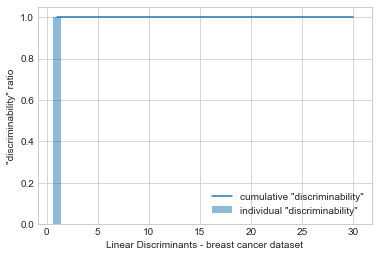

In [47]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(1, 31), discr, alpha=0.5, align='center',label='individual "discriminability"')
    plt.step(range(1, 31), cum_discr, where='mid',label='cumulative "discriminability"')
    plt.ylabel('"discriminability" ratio')
    plt.xlabel('Linear Discriminants - breast cancer dataset')
    #plt.ylim([-0.1, 1.1])
    plt.legend(loc='best')
    plt.show()


In [48]:
# wine
S_W = np.zeros((11,11))
for i in range(2):
    S_W += np.cov(X2_train[Y2==i].T)

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [49]:
S_W

array([[ 123.04676155,  -10.08647607,   27.13576928,   14.64437976,
           3.03120239,   -2.91853313,   13.92265766,   26.46901451,
         -94.33614237,  -10.88597103,  -52.26731624],
       [ -10.08647607,  186.65789751,  -24.53021639,    4.24923767,
          -2.86220441,  -12.8821799 ,    4.56649146,   -9.00752326,
           4.07342101,   -7.395075  ,   92.58231002],
       [  27.13576928,  -24.53021639,   86.61989696,    7.22258114,
           7.61812051,    8.02719586,   14.70589857,   10.0228777 ,
         -21.58288088,    5.29272992,  -22.35350395],
       [  14.64437976,    4.24923767,    7.22258114,  109.94910658,
           9.34523114,   21.20195725,   55.83799218,   69.56063238,
         -45.48225356,   -9.9706627 , -132.2820746 ],
       [   3.03120239,   -2.86220441,    7.61812051,    9.34523114,
          53.68417803,    6.74041085,   20.91605374,   16.07315678,
         -11.88857379,    3.90207267,  -72.59510342],
       [  -2.91853313,  -12.8821799 ,    8.0271958

In [50]:
N=np.bincount(Y2) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X2_train[Y2==i],axis=0)) for i in range(2)] # class means
mean_overall = np.mean(X2_train, axis=0) # overall mean
S_B=np.zeros((11,11))
for i in range(2):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(11,1)).dot(((vecs[i]-mean_overall).reshape(1,11))))

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [51]:
S_B

array([[ 1.56368568e+03,  1.96661332e+03,  5.88696231e+02,
         2.33365331e+03,  3.12195032e+03,  1.91464378e+02,
         3.88211097e+03,  4.40628451e+03, -2.97287006e+03,
        -1.52972138e+03, -2.08608423e+04],
       [ 1.96661332e+03,  2.47336662e+03,  7.40390392e+02,
         2.93498480e+03,  3.92640874e+03,  2.40800566e+02,
         4.88244618e+03,  5.54168779e+03, -3.73891375e+03,
        -1.92389717e+03, -2.62362258e+04],
       [ 5.88696231e+02,  7.40390392e+02,  2.21632300e+02,
         8.78573571e+02,  1.17535155e+03,  7.20824903e+01,
         1.46153676e+03,  1.65887756e+03, -1.11922583e+03,
        -5.75909357e+02, -7.85368789e+03],
       [ 2.33365331e+03,  2.93498480e+03,  8.78573571e+02,
         3.48275735e+03,  4.65921625e+03,  2.85742516e+02,
         5.79368428e+03,  6.57596383e+03, -4.43672803e+03,
        -2.28296481e+03, -3.11328386e+04],
       [ 3.12195032e+03,  3.92640874e+03,  1.17535155e+03,
         4.65921625e+03,  6.23307738e+03,  3.82264981e+02,
  

In [52]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])


Eigenvalues in decreasing order:

549.4321346201446
7.154651249500606e-13
1.5308885380921521e-13
1.5308885380921521e-13
1.3398932969439046e-13
3.675583142618717e-14
2.092959794539593e-14
1.5466480377275043e-14
9.274822071074256e-15
9.274822071074256e-15
1.1537386974806068e-15


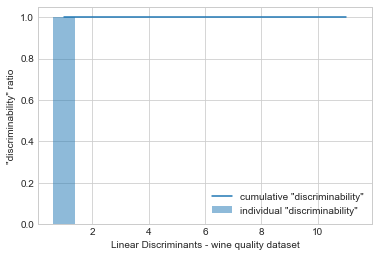

In [53]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(1, 12), discr, alpha=0.5, align='center',label='individual "discriminability"')
    plt.step(range(1, 12), cum_discr, where='mid',label='cumulative "discriminability"')
    plt.ylabel('"discriminability" ratio')
    plt.xlabel('Linear Discriminants - wine quality dataset')
    #plt.ylim([-0.1, 1.1])
    plt.legend(loc='best')
    plt.show()




### 3. Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it.

In [54]:
# Choose the number of components that capture about 90% of the variance
n1 = 6
n2 = 6

# Transform the data -PCA
pca1 = PCA(n_components=n1)
X1train_transform_pca = pca1.fit_transform(X1_train)
X1test_transform_pca = pca1.fit_transform(X1_test)
pca2 = PCA(n_components=n2)
X2train_transform_pca = pca2.fit_transform(X2_train)
X2test_transform_pca = pca2.fit_transform(X2_test)

# ICA
ICA_data1 = FastICA(n_components=n1)
X1train_transform_ica = ICA_data1.fit_transform(X1_train)
X1test_transform_ica= ICA_data1.fit_transform(X1_test)
ICA_data2 = FastICA(n_components=n2)
X2train_transform_ica = ICA_data2.fit_transform(X2_train)
X2test_transform_ica= ICA_data2.fit_transform(X2_test)

#RP
rp_data1=GaussianRandomProjection(n_components=n1)
X1train_transform_rp = rp_data1.fit_transform(X1_train)
X1test_transform_rp= rp_data1.fit_transform(X1_test)
rp_data2 = GaussianRandomProjection(n_components=n2)
X2train_transform_rp = rp_data2.fit_transform(X2_train)
X2test_transform_rp= rp_data2.fit_transform(X2_test)

#LDA
lda_data1=LinearDiscriminantAnalysis(n_components = n1)
X1train_transform_lda = lda_data1.fit_transform(X1_train, y1_train)
X1test_transform_lda= lda_data1.fit_transform(X1_test, y1_test)
lda_data2 = LinearDiscriminantAnalysis(n_components =n2)
X2train_transform_lda = lda_data2.fit_transform(X2_train, y2_train)
X2test_transform_lda= lda_data2.fit_transform(X2_test, y2_test)

source: https://github.com/siddharth691/Unsupervised-Learning/blob/master/dim_reduce_cluster_pca_sensor.py

NMI score: 0.666869
Homogeneity: 0.647
Completeness: 0.688
V-measure: 0.667
Run Time (s):   0.02867
For n_clusters = 2 The average silhouette_score is : 0.41719863750097674


C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


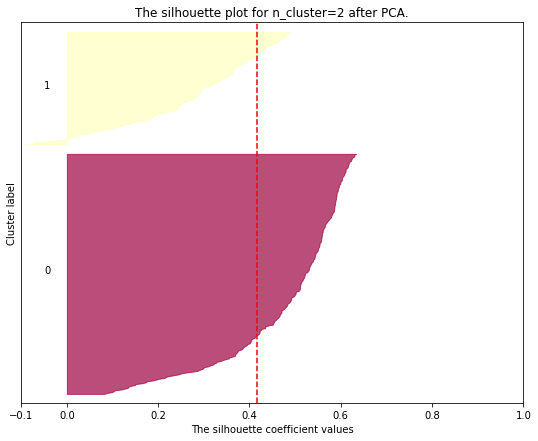

In [56]:
# k means - cancer, after PCA
range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1train_transform_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X1train_transform_pca)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(y1_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y1_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y1_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y1_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y1, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1train_transform_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1train_transform_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for n_cluster=2 after PCA.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #cmap = cm.get_cmap("Spectral")
    #colors = cmap(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter( pd.DataFrame(X1train_transform_pca).iloc[:, 2], pd.DataFrame(X1train_transform_pca).iloc[:, 2], marker='.', s=30, lw=0, alpha=0.7,
    #            c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 2], centers[:, 2], marker='o',
    #           c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #   ax2.scatter( c[2], c[2], marker='$%d$' % i, alpha=1,
    #               s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    #plt.suptitle(("Silhouette analysis for KMeans clustering on breast cancer data "
    #             "with n_clusters = %d" % n_clusters),
    #            fontsize=14, fontweight='bold')

    plt.show()

NMI score: 0.497898
Homogeneity: 0.455
Completeness: 0.545
V-measure: 0.496
Run Time (s):   0.03262
For n_clusters = 2 The average silhouette_score is : 0.17419394761098936


C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


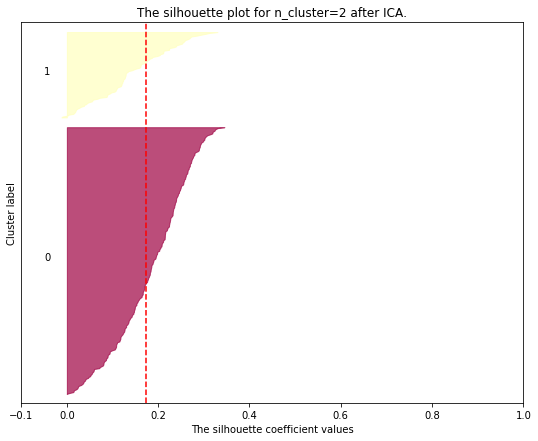

In [61]:
# k means - cancer, after ICA
range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1train_transform_ica) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X1train_transform_ica)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(y1_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y1_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y1_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y1_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y1, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1train_transform_ica, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1train_transform_ica, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for n_cluster=2 after ICA.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #cmap = cm.get_cmap("Spectral")
    #colors = cmap(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter( pd.DataFrame(X1train_transform_pca).iloc[:, 2], pd.DataFrame(X1train_transform_pca).iloc[:, 2], marker='.', s=30, lw=0, alpha=0.7,
    #            c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 2], centers[:, 2], marker='o',
    #           c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #   ax2.scatter( c[2], c[2], marker='$%d$' % i, alpha=1,
    #               s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    #plt.suptitle(("Silhouette analysis for KMeans clustering on breast cancer data "
    #             "with n_clusters = %d" % n_clusters),
    #            fontsize=14, fontweight='bold')

    plt.show()

NMI score: 0.690166
Homogeneity: 0.675
Completeness: 0.706
V-measure: 0.690
Run Time (s):   0.02077
For n_clusters = 2 The average silhouette_score is : 0.41315388389139457


C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


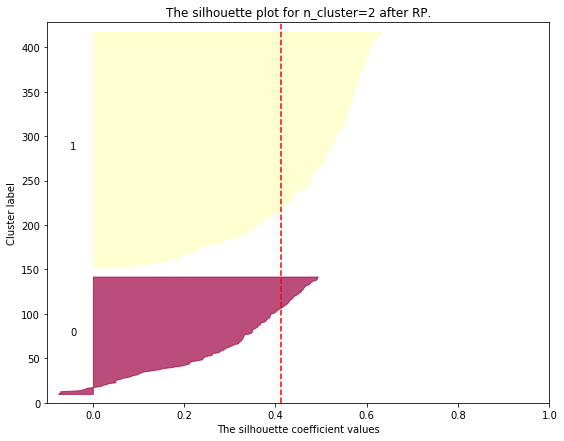

In [63]:
# k means - cancer, after RP
range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1train_transform_rp) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X1train_transform_rp)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(y1_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y1_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y1_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y1_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y1, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1train_transform_rp, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1train_transform_rp, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for n_cluster=2 after RP.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

NMI score: 0.793161
Homogeneity: 0.783
Completeness: 0.803
V-measure: 0.793
Run Time (s):   0.01898
For n_clusters = 2 The average silhouette_score is : 0.7131860897795249


C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


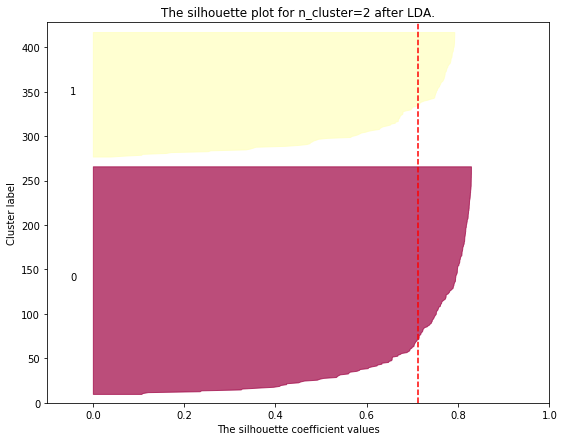

In [64]:
# k means - cancer, after LDA
range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1train_transform_lda) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X1train_transform_lda)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(y1_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y1_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y1_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y1_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y1, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1train_transform_lda, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1train_transform_lda, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for n_cluster=2 after LDA.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.102482
Homogeneity: 0.118
Completeness: 0.089
V-measure: 0.102
Run Time (s):   0.09995
For n_clusters = 2 The average silhouette_score is : 0.2768447873470022


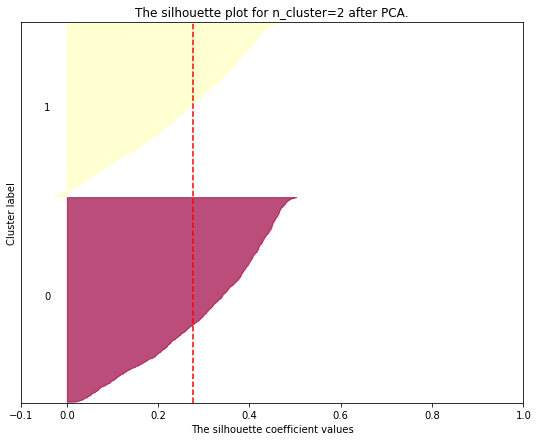

In [57]:
#K means clustering - Wine after PCA

range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X2train_transform_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X2train_transform_pca)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(y2_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y2_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y2_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y2_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(y2_train, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2train_transform_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2train_transform_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for n_cluster=2 after PCA.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #cmap = cm.get_cmap("Spectral")
    #colors = cmap(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter( df.DataFrame(X2train_transform_pca.iloc)[:, 10], df.DataFrame(X2train_transform_pca).iloc[:, 8], marker='.', s=30, lw=0, alpha=0.7,
    #            c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 10], centers[:, 8], marker='o',
    #            c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #    ax2.scatter( c[10], c[8], marker='$%d$' % i, alpha=1,
    #               s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    #plt.suptitle(("Silhouette analysis for KMeans clustering on wine quality data "
    #              "with n_clusters = %d" % n_clusters),
    #             fontsize=14, fontweight='bold')

    plt.show()

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.089774
Homogeneity: 0.102
Completeness: 0.079
V-measure: 0.089
Run Time (s):   0.16885
For n_clusters = 2 The average silhouette_score is : 0.13663873472950783


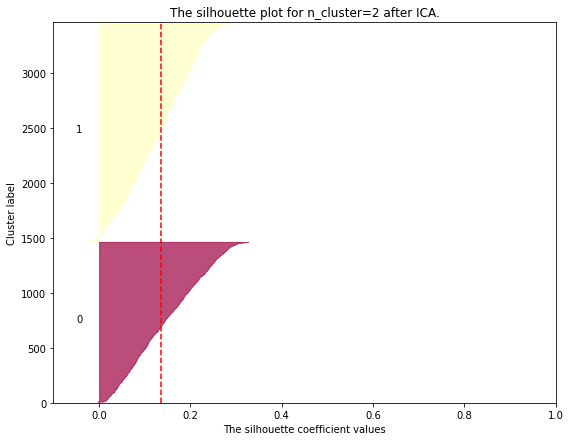

In [65]:
#K means clustering - Wine after ICA

range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X2train_transform_ica) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X2train_transform_ica)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(y2_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y2_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y2_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y2_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(y2_train, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2train_transform_ica, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2train_transform_ica, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for n_cluster=2 after ICA.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.012971
Homogeneity: 0.015
Completeness: 0.011
V-measure: 0.013
Run Time (s):   0.08396
For n_clusters = 2 The average silhouette_score is : 0.27437963087008677


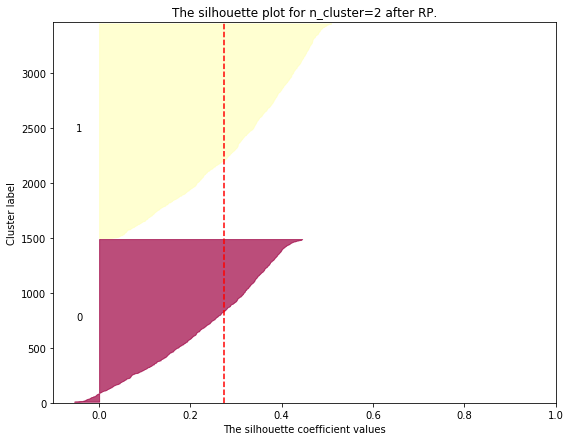

In [66]:
#K means clustering - Wine after RP

range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X2train_transform_rp) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X2train_transform_rp)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(y2_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y2_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y2_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y2_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(y2_train, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2train_transform_rp, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2train_transform_rp, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for n_cluster=2 after RP.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.109352
Homogeneity: 0.125
Completeness: 0.096
V-measure: 0.108
Run Time (s):   0.03973
For n_clusters = 2 The average silhouette_score is : 0.5955881080459192


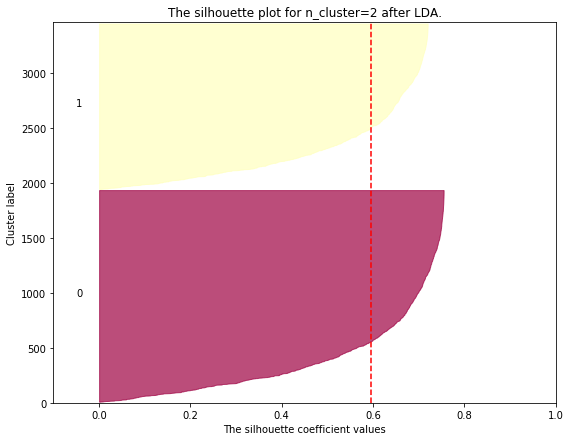

In [67]:
#K means clustering - Wine after LDA

range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X2train_transform_lda) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X2train_transform_lda)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(y2_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y2_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y2_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y2_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(y2_train, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2train_transform_lda, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2train_transform_lda, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for n_cluster=2 after LDA.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

In [58]:
#Expectation Maximization clustering - cancer, after PCA

for n_clusters in range_n_clusters:
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(X1train_transform_pca)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.predict(X1train_transform_pca)
    #metrics
    #print('Evaluation Metrics')
    print("NMI score: %.6f" % normalized_mutual_info_score(y1_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y1_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y1_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y1_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y2, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))

    #plt.show()

NMI score: 0.377494
Homogeneity: 0.385
Completeness: 0.370
V-measure: 0.377
Run Time (s):   0.02602


C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [68]:
#Expectation Maximization clustering - cancer, after ICA

for n_clusters in range_n_clusters:
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(X1train_transform_ica)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.predict(X1train_transform_ica)
    #metrics
    #print('Evaluation Metrics')
    print("NMI score: %.6f" % normalized_mutual_info_score(y1_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y1_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y1_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y1_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y2, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))

NMI score: 0.377494
Homogeneity: 0.385
Completeness: 0.370
V-measure: 0.377
Run Time (s):   0.02163


C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [69]:
#Expectation Maximization clustering - cancer, after RP

for n_clusters in range_n_clusters:
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(X1train_transform_rp)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.predict(X1train_transform_rp)
    #metrics
    #print('Evaluation Metrics')
    print("NMI score: %.6f" % normalized_mutual_info_score(y1_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y1_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y1_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y1_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y2, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))

NMI score: 0.495453
Homogeneity: 0.503
Completeness: 0.488
V-measure: 0.495
Run Time (s):   0.01922


C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [70]:
#Expectation Maximization clustering - cancer, after LDA

for n_clusters in range_n_clusters:
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(X1train_transform_lda)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.predict(X1train_transform_lda)
    #metrics
    #print('Evaluation Metrics')
    print("NMI score: %.6f" % normalized_mutual_info_score(y1_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y1_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y1_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y1_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y2, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))

NMI score: 0.793161
Homogeneity: 0.783
Completeness: 0.803
V-measure: 0.793
Run Time (s):   0.01222


C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [59]:
#Expectation Maximization clustering - wine after PCA

for n_clusters in range_n_clusters:
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(X2train_transform_pca)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.predict(X2train_transform_pca)
    #metrics
    #print('Evaluation Metrics')
    print("NMI score: %.6f" % normalized_mutual_info_score(y2_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y2_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y2_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y2_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y2, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))

    #plt.show()

NMI score: 0.081408
Homogeneity: 0.092
Completeness: 0.072
V-measure: 0.081
Run Time (s):   0.06294


C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [71]:
#Expectation Maximization clustering - wine after ICA

for n_clusters in range_n_clusters:
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(X2train_transform_ica)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.predict(X2train_transform_ica)
    #metrics
    #print('Evaluation Metrics')
    print("NMI score: %.6f" % normalized_mutual_info_score(y2_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y2_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y2_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y2_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y2, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))

NMI score: 0.081731
Homogeneity: 0.092
Completeness: 0.072
V-measure: 0.081
Run Time (s):   0.05340


C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [72]:
#Expectation Maximization clustering - wine after RP

for n_clusters in range_n_clusters:
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(X2train_transform_rp)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.predict(X2train_transform_rp)
    #metrics
    #print('Evaluation Metrics')
    print("NMI score: %.6f" % normalized_mutual_info_score(y2_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y2_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y2_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y2_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y2, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))

NMI score: 0.004315
Homogeneity: 0.003
Completeness: 0.007
V-measure: 0.004
Run Time (s):   0.05650


C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [73]:
#Expectation Maximization clustering - wine after LDA

for n_clusters in range_n_clusters:
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    start_time = timeit.default_timer()
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(X2train_transform_lda)
    end_time = timeit.default_timer()
    cluster_labels = clusterer.predict(X2train_transform_lda)
    #metrics
    #print('Evaluation Metrics')
    print("NMI score: %.6f" % normalized_mutual_info_score(y2_train, cluster_labels))
    print('Homogeneity: %0.3f' % homogeneity_score(y2_train, cluster_labels))
    print('Completeness: %0.3f' % completeness_score(y2_train, cluster_labels))
    print('V-measure: %0.3f' % v_measure_score(y2_train, cluster_labels))
    #print('Adjusted rand score: %0.3f' % adjusted_rand_score(Y2, cluster_labels)
    print("Run Time (s):   "+"{:.5f}".format(end_time - start_time))

NMI score: 0.116975
Homogeneity: 0.133
Completeness: 0.103
V-measure: 0.116
Run Time (s):   0.01877


C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\E015919\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


### 4. Apply the dimensionality reduction algorithms to one of your datasets from assignment #1 (if you've reused the datasets from assignment #1 to do experiments 1-3 above then you've already done this) and rerun your neural network learner on the newly projected data.

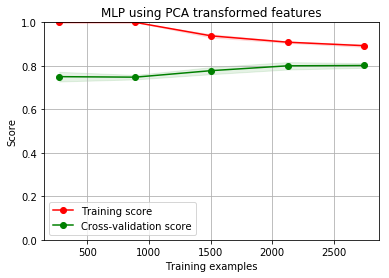

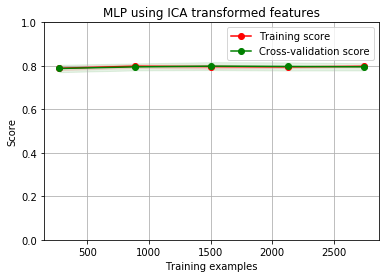

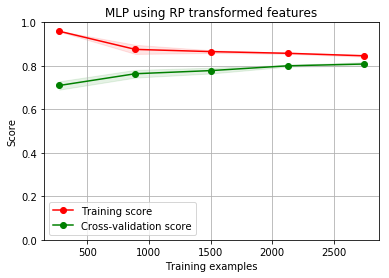

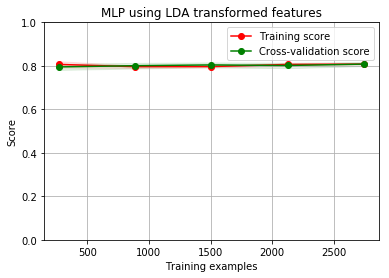

In [76]:
#Rerun ANN on transformed features
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

clf = MLPClassifier(max_iter=1000,solver='lbfgs',hidden_layer_sizes=[50,],random_state=1)
plot_learning_curve(clf, "MLP using PCA transformed features", X2train_transform_pca, y2_train, ylim=[0,1])
plot_learning_curve(clf, "MLP using ICA transformed features", X2train_transform_ica, y2_train, ylim=[0,1])
plot_learning_curve(clf, "MLP using RP transformed features", X2train_transform_rp, y2_train, ylim=[0,1])
plot_learning_curve(clf, "MLP using LDA transformed features", X2train_transform_lda, y2_train, ylim=[0,1])

### 5. Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms (you've probably already done this), treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. Again, rerun your neural network learner on the newly projected data.

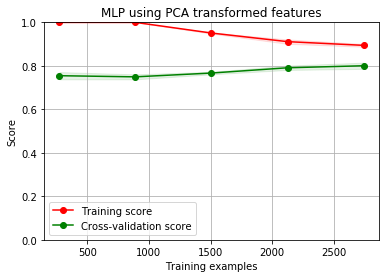

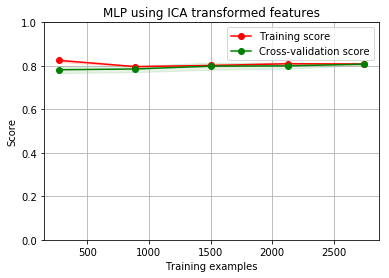

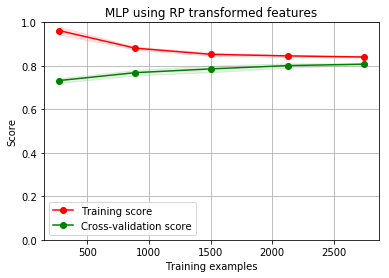

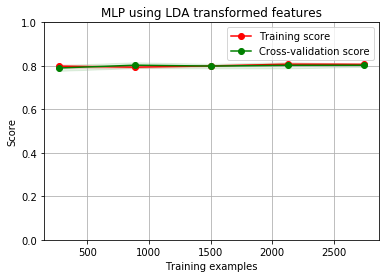

In [77]:
#Rerun ANN on transformed features with clusters new feature

clf = MLPClassifier(max_iter=1000,solver='lbfgs',hidden_layer_sizes=[50,],random_state=1)

clusterer = KMeans(n_clusters=2, random_state=10).fit(X2train_transform_pca)
y_kmeans = clusterer.labels_
X_df = pd.DataFrame(X2train_transform_pca)
X_df[11] = y_kmeans
plot_learning_curve(clf, "MLP using PCA transformed features", X_df, y2_train, ylim=[0,1])

clusterer = KMeans(n_clusters=2, random_state=10).fit(X2train_transform_ica)
y_kmeans = clusterer.labels_
X_df = pd.DataFrame(X2train_transform_ica)
X_df[11] = y_kmeans
plot_learning_curve(clf, "MLP using ICA transformed features", X_df, y2_train, ylim=[0,1])

clusterer = KMeans(n_clusters=2, random_state=10).fit(X2train_transform_rp)
y_kmeans = clusterer.labels_
X_df = pd.DataFrame(X2train_transform_rp)
X_df[11] = y_kmeans
plot_learning_curve(clf, "MLP using RP transformed features", X_df, y2_train, ylim=[0,1])

clusterer = KMeans(n_clusters=2, random_state=10).fit(X2train_transform_lda)
y_kmeans = clusterer.labels_
X_df = pd.DataFrame(X2train_transform_lda)
X_df[11] = y_kmeans
plot_learning_curve(clf, "MLP using LDA transformed features", X_df, y2_train, ylim=[0,1])
